# Review

Hello, Pablo!

My name is Yaroslav. I'm going to review your project and try to help you make it even better! Let's get started!

You can find my comments in <span style="color:green">green</span>, <span style="color:yellow">yellow</span> and <span style="color:red">red</span> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done successfully.
</div>

<div class="alert alert-block alert-warning">
<b>Improve:</b> if i can give some recommendations to improve your project.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Project can't be accepted with the red comments.
</div>

Please don't delete my comments. If you have any questions, please write them and I will be happy to help you! For example, you can use <span style="color:blue">blue</span> boxes like this: 

<div class="alert alert-block alert-info">
Student's comment.
</div>

### <span style="color:orange">General feedback</span>

- The project is executed at a high level!
- The final metric is excellent.
- However, the graph is not built quite correctly. And there is not enough analysis of this graph. It is also worth improving the overall conclusion.


### <span style="color:orange">General feedback (v2)</span>

- The project is perfectly finalized, thank you for your time!

The project is accepted, good luck in further education!

---

# Project

Supermarket chain Good Seed is introducing a computer vision system for processing customer photos. Photofixation in the checkout area will help determine the age of customers. We should determine the age through the photso and then analyze the purchases may interest them

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

It would be great to add a project title and description. Getting started is very important. The user sees this part of the report first, and it makes it clear what the project is dedicated to.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

👍

</div>

# 1. Exploratory data analysis

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [4]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [2]:
labels.shape[0]

7591

In [26]:
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [27]:
labels['real_age'].value_counts()

30     317
25     315
27     229
26     226
28     217
      ... 
96       2
100      1
93       1
91       1
97       1
Name: real_age, Length: 97, dtype: int64

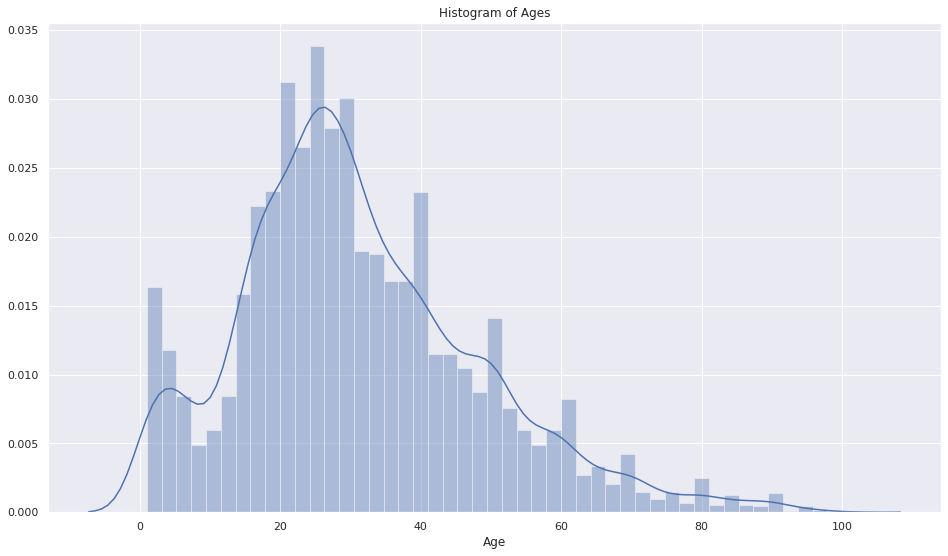

In [25]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.set() 
plt.title("Histogram of Ages") 
ax = sns.distplot(x, axlabel="Age", kde=True)

having a look to our graph analysis from our customers Age, the information is generally grouped into a interval of ages from 20 to 40. So it is a potentional dataset to train and identify the agres from 30-40 ages. the problem is that for elder ages it is not a good way to use this information to modelizes and determine this ages 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>

<s>Please don't forget to sign the chart and the axes. Also, this type of chart is not suitable here. Here it is better to use a histogram. We should also add a graph analysis. For example, is our model will be well trained to identify older people?</s>

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

The graph is perfect now!

</div>

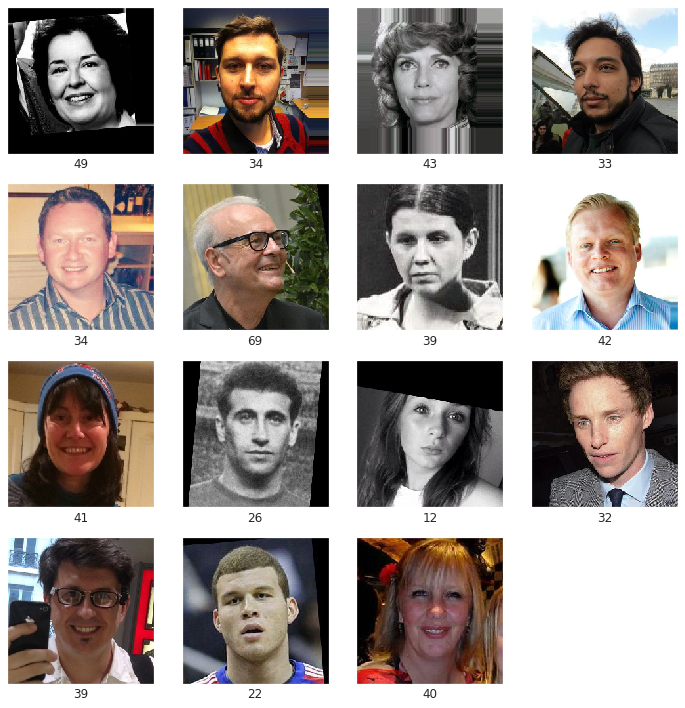

In [32]:
features, target = next(train_gen_flow)
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xlabel(target[i])
# remove axes and place the images closer to one another for a more compact output
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

In the names (`title') of the images, it would be great to print the age.

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b>

Well done!

</div>

# 2. Model training

Transfer the model training code and the result of printing on the screen here.


(The code in this section is run on a separate GPU platform, so it is not designed as a cell with a code, but as a code in a text cell)

```python
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
def load_train(path):
    train_datagen = ImageDataGenerator(
        rescale=1/255,
        validation_split=0.25
        )
    train_datagen_flow = train_datagen.flow_from_dataframe(
         dataframe= pd.read_csv(path + 'labels.csv'),
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        seed=42,
        subset='training',
        x_col='file_name',
        y_col='real_age',
        directory=path + 'final_files/')
 
    return train_datagen_flow
 
def load_test(path):
    test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)
 
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe= pd.read_csv(path + 'labels.csv'),
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=42,
        x_col='file_name',
        y_col='real_age',
        directory=path + 'final_files/')
 
    return test_datagen_flow
 
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse',
                  metrics=['mae'])
 
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=3,
               steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

```

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

The model is correct.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

It would be great to work with augmentation. For example, add a horizontal flip on the training part. In fact, this would increase the sample by 2 times. Moreover, the images obtained in this way would be indistinguishable from the real ones. You can also add a rotation of images by 15-20 degrees in a certain percentage of cases. You can also change the contrast, crop, and zoom. Perhaps this would allow us to further improve the model.

</div>


```

# < paste the result of printing on the screen here >
# < you can delete long lines with model downloading>

```

# 3. Trained model analysis


**Epoch 1/3**
- 356/356 - 149s - loss: 197.5670 - mae: 10.2455 - val_loss: 622.7752 - val_mae: 19.8723 <br>
**Epoch 2/3**
- 356/356 - 43s - loss: 66.0927 - mae: 6.1598 - val_loss: 148.6137 - val_mae: 9.4838 <br>
**Epoch 3/3**
- 356/356 - 43s - loss: 35.5409 - mae: 4.6349 - val_loss: 94.0305 - val_mae: 7.4474

We can conclude that we finally reach our target to not to pass a MAE metric of 7. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b>

The result is good. However, if more epochs were used, it would be even better 😉

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b>

It would be great to say a few more words about business. Does the resulting model allow you to solve the tasks set by the business (They are mentioned in the project description)?

</div>


# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis have been transferred to the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model's printing on the screen result has been transferred to the final notebook
- [x]  The findings have been provided based on the results of the model training